# Machine learning introduction

## Setup the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Machine Learning in a nutshell

Any Machine Learning (ML) model makes an atempt to contruct a function from
the `n` dimensioanal input space (`features`) to the ``m`` dimensional output space (`targets` or `labels`):

$$\Huge{
R^{n} \rightarrow R^{m}
}
$$

There are two main distinctions of ML models basing on the type ot the output space:

* according to the type of the output space:
    * **regression** - the output space is the ussual $R^{m}$
    * **categorisation** - the output space is a discrete set of possibilities - ``categories``. The model is epected to provide probability that example ``x`` belong to class ``y``.  
* according to the avalaibility of the data in the output space - ``labels``:
    * **supervised learning** - a full set of input: ``X``, and output: ``Y`` values is available: ``data=(X,Y)``
    * **unsupervised learing** - only the input data: ``X`` is avalable. ``Y`` values are usually unknown: ``data=(X)``

Here capital X, Y denote a set of feature, or label values.A single ``example`` from the full dataset will be denoted with small letterrs: 

$$
\huge{
(x,y) \in (X,Y)
}
$$

The $X \rightarrow Y$  correspondence is ussually not deterministic (mostly due to lack of our knowlwdge, e,g, ``X`` does not cover all the variables controlling the ``Y`` value) the ML models provide some probabilistic estimates, like expectation value:

$$
\Huge{
   f(x) = \int_{Y} y \cdot p(x,y) dy = <y(x)>
}
$$
where $p(x,y)$ is a joint probability ditribution for (x,y) pair.

## Linear model - an archetypic ML model.

We will play with a simple, thereore easy to understand linar model:

$$
\huge{
x = (x_{1}, ...,x_{m}), y = (y) \\
f(x) = \theta_{0} + \theta_{i} \cdot x_{i}
}
$$

This example will allow us to introduce basic ML concepts of `loss function` and `gradient decent`.
We will also learn basic programing techniques using numpy arrays parrarel manipulations.

We will use a rank 1 ```x``` and ```y``` arrays: a single dimensional case. We will:

1) draw a random set X
2) draw a random set Y (y values for every x value). The Y will have a random noise ($\mathbf{\epsilon}$), around the ideal case:
$$
$$
$$
\huge{
y = \theta_{0} + \theta_{1} \cdot x + \epsilon \\
}
$$
3) define a linear model:
$$
\huge{
f(x) = \theta_{0} + \theta_{1} \cdot x
}
$$
4) perform a ``training``
5) estimate the model performance

### Generate the X set

Here the ``X`` is just a set of random values in one dimention. This meas we have one feature, `n=1`, and `nPoints` examples.

In [2]:
%time

minX = 0
maxX = 1
nPoints = 5
x = np.random.default_rng().uniform(minX, maxX, nPoints)

print(colored("Shape of the X array:","blue"),x.shape)

#it will be convenient to represent X as a an array: nPoints rows, one column
x = np.reshape(x, (-1,1))
print(colored("Shape of the X array:","blue"),x.shape)
print(colored("First ten examples:\n","blue"),x[:10])

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs
Shape of the X array: (5,)
Shape of the X array: (5, 1)
First ten examples:
 [[0.94561026]
 [0.89356287]
 [0.98715047]
 [0.07832381]
 [0.14605881]]


### Generate Y according to given ```true``` formula:

$$
\huge{
y = \theta_{0} + \theta_{1} \cdot x 
}
$$

In [3]:
#define coefficients as a array
theta = (1,3)

# calculate the y values before smearing
y = theta[0] + theta[1]*x
print(colored("First few Y values:\n","blue"), y[:10])

# calculate the y values using a more compact formula
# substitute each X value by a pair (1,X):
ones = np.ones(x.shape[0])
x = np.column_stack((ones, x))

print(colored("Extended X shape:\n","blue"),x.shape)
print(colored("First few X values:\n","blue"),x[:10])

#write linear formula as a element-wise multiplication,
#followed by sum of columns: along axis=1 direction
y = np.sum(theta*x, axis=1)
print(colored("First few Y values:\n","blue"), y[:10])

#change y to a rank-2 array:
#here a row is particular example
#column - is a target at this example
y = np.reshape(y,(-1,1))
print(colored("First few Y values:\n","blue"), y[:10])

First few Y values:
 [[3.83683079]
 [3.6806886 ]
 [3.96145142]
 [1.23497142]
 [1.43817644]]
Extended X shape:
 (5, 2)
First few X values:
 [[1.         0.94561026]
 [1.         0.89356287]
 [1.         0.98715047]
 [1.         0.07832381]
 [1.         0.14605881]]
First few Y values:
 [3.83683079 3.6806886  3.96145142 1.23497142 1.43817644]
First few Y values:
 [[3.83683079]
 [3.6806886 ]
 [3.96145142]
 [1.23497142]
 [1.43817644]]


### add a Gausian noise to the ```true``` formula:

$$
\huge{
y =  \epsilon \\
\epsilon = Normal(\mu=y, \sigma=1)
}
$$

In [4]:
%time
#define the gaussian smearing parameters
mu = y
sigma = 2.0

#generate nNoisePoints values for each of nXPoints
y_with_noise = np.random.default_rng().normal(mu, sigma)

print(colored("Shape of the Y array:","blue"),y_with_noise.shape)
print(colored("First few Y values with noise:\n","blue"), y_with_noise[:10])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
Shape of the Y array: (5, 1)
First few Y values with noise:
 [[3.82167551]
 [4.05813437]
 [2.13109233]
 [0.71760066]
 [0.22693742]]


### Control plot

Plot a histogram of `Y_noise - Y`. Check if it looks at expected.

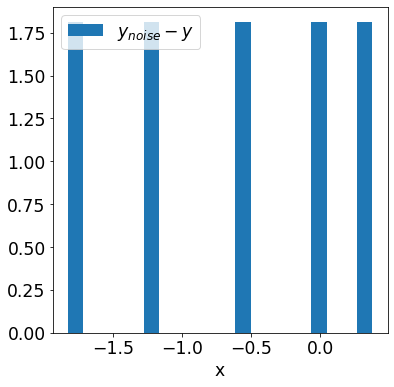

In [5]:
#control the size of the plot
fig, ax = plt.subplots(figsize=(6, 6))

# plot a histogram of fidderence between noisy and clean values
ax.hist(y_with_noise-y, bins=20, density=True, label=r"$y_{noise} - y$");
ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

### Training: a loss function

We find the estimates of out model parameters: $a = (a_{0}, a_{1})$ at those which provide a model ``f(X)`` that minimizes a **loss function:**

$$
\huge{
L(f(X), Y)
}
$$

Most polular loss functions:

* **regression taks:** mean squared error (MSE):

$$
\huge{
L(f(X), Y) = \frac{1}{N} \sum_{X} (f(x) - y)^{2}
}
$$

where `N` in the size of the dataset (X,Y). We **never** use all the data points at hand here! ``X`` is a subsable - a **training** set of the whole data we have. Unless we can have infinie amount of data -as in our case, where we always can generate more data.

Most popular loss functions:

* **categorisation taks:** cross entropy:

$$
\huge{
L(f(X), Y) = -\frac{1}{N} \sum_{X} \log f_{correct~class}(x)
}
$$

If one observes that:

* model provides probabilty that example belongs to class ``i``: $f(x) = (p_{0}(x), p_{1}(x),...p_{m}(x))$ (note here f(x) is a vector, with rank equal to number of classes). We select only the componenct corresponding to correct class.

* sum over all examples from given class, divided by ``N`` gives the ``true`` probability that random example belong to class ``i``:
$$
\large{
-\frac{1}{N} \sum_{X_{particular~class}} \log f_{this~class}(x) = \\
-\log f_{this~class}(x) \sum_{X_{particular~class}} 1 = \\
-\log f_{this~class}(x) \frac{N_{particular~class}}{N} = \\
-\log f_{this~class}(x) p_{this~class}
}
$$

the cross entropy can be written in most popular form (i - denotes correct class index):

$$
\huge{
L(f(X), Y) = -\sum_{X} p_{i,true}\log p_{i,model}(x)
}
$$

Let's calculate the loss function on our data (without the noise) for some random values of model parameters.

**Please:**

* add a block of code that will check the loss function value with model parameters the same as used for sample generation.
What is the expected result?

In [6]:
min_theta = 0
max_theta = 3
nParams = 2
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

print(colored("Some random parameters are:","blue"),theta_model)

#calculate the model result on the data
#use keepdims=1 to get correct output shape
y_model = np.sum(theta_model*x, axis=1, keepdims=True)

#calculate the loss function
loss = np.mean((y_model - y)**2)
print(colored("Loss function with random parameters:","blue"), loss)

#BEGIN_SOLUTION
y_model = np.sum(theta*x, axis=1, keepdims=True)
loss = np.mean((y_model - y)**2)
print(colored("Loss function with nominal parameters:","blue"), loss)
#END_SOLUTION
pass

Some random parameters are: [1.61956788 0.54788862]
Loss function with random parameters: 1.7703566850949817
Loss function with nominal parameters: 0.0


### Training: the gradient descent

How the parameters of the model are found? 

`We calculate gradient vector of the loss function wrt. the parameters, and go along the gradient to the minimim of the loss function.`

The algorithm is as follows:

1) define starting values for $\theta$ parameters: `init_theta`
2) select a subsample of examples to be used for the loss function calculation: a `batch`
3) calculate the loss function gradient. In our case this is:
$$
$$
$$
\huge{
\nabla_{\theta} L = \nabla_{\theta} \frac{1}{N} \sum_{X} (\theta^{T} \cdot x - y)^{2} = \\
\frac{2}{N} \sum_{X} (\theta^{T} \cdot x - y)x
}
$$

4) update the $\theta$ parameter proportionally to the gradient (proportionality parameter $\alpha)$:
$$
$$
$$
\huge{
 \theta_{new} = \theta_{old} - \alpha \cdot \nabla_{\theta} L
}
$$
5) loop with batches thorugh the whole dataset
5) repeat reading the whole datasert many times. One pass through the whole dataset is called an `epoch`

In [7]:
def batch_gradient_descend(x_batch, y_batch, init_theta, alpha, verbose=False):
    
    theta = init_theta 
    #print(colored("theta value:\n","blue"),theta)
    #model response
    y_model = np.sum(theta*x_batch, axis=1, keepdims=True)
    if verbose:
        print(colored("model response:\n","blue"),y_model[:10])
    #calculate the update value
    delta = -alpha*(y_model - y_batch)*x_batch
    if verbose:
        print(colored("delta for each example:\n","blue"),delta[:10])
    #sum the update value over the examples provides
    delta = np.mean(delta, axis=0)
    if verbose:
        print(colored("delta averaged over examples:\n","blue"),delta)
    #apply the update to theta
    theta = theta + delta
    return theta 


#test the function on small batch
x_batch = x[:3]
y_batch = y[:3,]
print(colored("X test:\n","blue"),x_batch)
print(colored("Y test:\n","blue"),y_batch)

theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)
alpha = 1
minDelta = 1E-3
batch_gradient_descend(x_batch, y_batch, theta_model, alpha, True)

X test:
 [[1.         0.94561026]
 [1.         0.89356287]
 [1.         0.98715047]]
Y test:
 [[3.83683079]
 [3.6806886 ]
 [3.96145142]]
model response:
 [[3.18912851]
 [3.03911425]
 [3.30885831]]
delta for each example:
 [[0.64770227 0.61247392]
 [0.64157435 0.57328702]
 [0.6525931  0.64420759]]
delta averaged over examples:
 [0.64728991 0.60998951]


array([1.11092122, 3.49225223])

**Please:**
* provide input parameters to the `batch_gradient_descend()` for which you can easily (=without any calculations!) evalue the expected result.

In [8]:
#BEGIN_SOLUTION
batch_gradient_descend(x_batch, y_batch, theta, alpha, True)
#END_SOLUTION
pass

model response:
 [[3.83683079]
 [3.6806886 ]
 [3.96145142]]
delta for each example:
 [[-0. -0.]
 [-0. -0.]
 [-0. -0.]]
delta averaged over examples:
 [0. 0.]


## The training loop

* define loop with `batches` over the dataset: `epoch`
* calculate the loss function for each epoch

For simplicity we will take the whole dataset as a single batch. Ussualy batch size is a comprimise between memory capacity, and number of parameters updates we want to make.

In [9]:
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

y_model = np.sum(theta_model*x, axis=1, keepdims=True)
loss = np.mean((y_model - y)**2)
print(colored("Theta value before training:","blue"),theta_model)
print(colored("Loss function with initial parameters:","blue"), loss)

alpha = 0.1
nEpochs = 100
for iEpoch in range(nEpochs):
    x_batch = x
    y_batch = y
    theta_model = batch_gradient_descend(x_batch, y_batch, theta_model, alpha)
    
    y_model = np.sum(theta_model*x, axis=1, keepdims=True)
    loss = np.mean((y_model - y)**2)
    #print(colored("Epoch:","blue"), iEpoch, colored("loss:","blue"),loss)
    
print(colored("Theta value after training:","blue"),theta_model)

Theta value before training: [1.44409439 2.20472356]
Loss function with initial parameters: 0.10708681816467505
Theta value after training: [1.15856292 2.77058199]


## Model performance on training data

* we plot the model results and investigate by eye how well it works on the `training` data.
  Unortunately in real application eye inspection is ussually not possible as data is multidimensional.

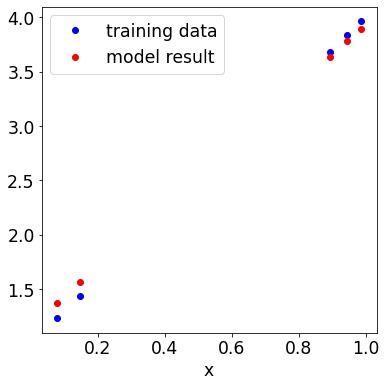

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

#plot the data points
ax.plot(x[:,1],y, "bo", label="training data")

#plot the fitted line
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
ax.plot(x[:,1],y_model, "ro", label="model result")

ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

## Model performance on test data

* we investigate how model work for data not used for training - the `test` dataset. The performance estimate has to be made alway on a separate sample - the `test` dataset.

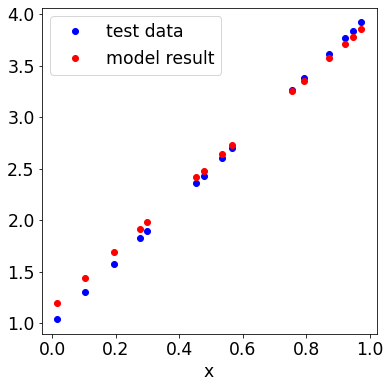

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

#create the test dataset
nPoints = 15
x_test = np.random.default_rng().uniform(minX, maxX, nPoints)
x_test = np.reshape(x_test, (-1,1))
ones = np.ones(x_test.shape[0])
x_test = np.column_stack((ones, x_test))
y_test = np.sum(theta*x_test, axis=1)

#plot the data points
ax.plot(x_test[:,1],y_test, "bo", label="test data")

#plot the fitted line
y_model = np.sum(theta_model*x_test, axis=1, keepdims=True)
ax.plot(x_test[:,1],y_model, "ro", label="model result")

ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

## Run the training on noisy data

For far the model performance was the same on training and test data. This was due to the fsce there was no statistical fluctuaton between the two datasets.
Now we will use the noisy dataset for training.

In [12]:
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

y_model = np.sum(theta_model*x, axis=1, keepdims=True)
loss = np.mean((y_model - y_with_noise)**2)
print(colored("Theta value before training:","blue"),theta_model)
print(colored("Loss function with initial parameters:","blue"), loss)

alpha = 0.01
nEpochs = 100
for iEpoch in range(nEpochs):
    x_batch = x
    y_batch = y_with_noise
    theta_model = batch_gradient_descend(x_batch, y_batch, theta_model, alpha)
    
    y_model = np.sum(theta_model*x, axis=1, keepdims=True)
    loss = np.mean((y_model - y_with_noise)**2)
    #print(colored("Epoch:","blue"), iEpoch, colored("loss:","blue"),loss)
    
print(colored("Theta value after training:","blue"),theta_model)
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
loss = np.mean((y_model - y)**2)
print(colored("Loss function with final parameters:","blue"), loss)

Theta value before training: [2.38056637 2.6336117 ]
Loss function with initial parameters: 3.922547559972749
Theta value after training: [1.36981916 2.17710755]
Loss function with final parameters: 0.130334447120814


* plot the model result on training, noisy data
* plot the model result on test, clean data

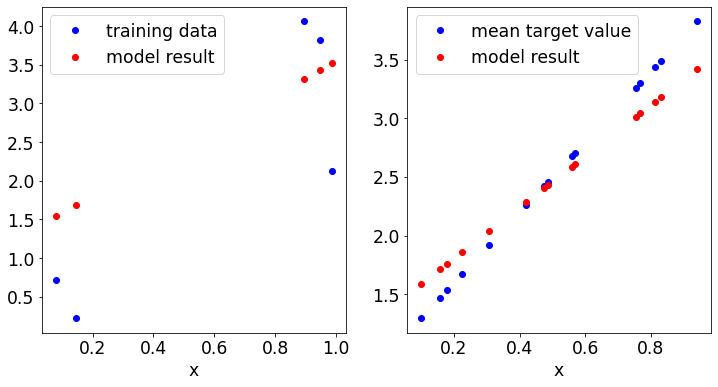

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

#plot the data points
ax[0].plot(x[:,1],y_with_noise, "bo", label="training data")

#plot the fitted line
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
ax[0].plot(x[:,1],y_model, "ro", label="model result")

ax[0].set_xlabel("x")
ax[0].set_ylabel("")
ax[0].legend();

#create the test dataset
nPoints = 15
x_test = np.random.default_rng().uniform(minX, maxX, nPoints)
x_test = np.reshape(x_test, (-1,1))
ones = np.ones(x_test.shape[0])
x_test = np.column_stack((ones, x_test))
y_test = np.sum(theta*x_test, axis=1)

#plot the data points
ax[1].plot(x_test[:,1],y_test, "bo", label="mean target value")

#plot the fitted line
y_model = np.sum(theta_model*x_test, axis=1, keepdims=True)
ax[1].plot(x_test[:,1],y_model, "ro", label="model result")

ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].legend();

## Non linear models: neural networks

Let's define a ``neuron`` function on $R^{n} \rightarrow R$:
$$
\huge{
 f(\theta, x) = A(\sum_{i=1}^{N} \theta_{i} x_{i} + \beta)
}
$$

where `A` - activation function: any function of a single argument that fullfils requirents:

$$
\huge{
 \lim_{x\rightarrow -\infty} f(x) \rightarrow 0 \\
 \lim_{x\rightarrow +\infty} f(x) \rightarrow 1 \\
}
$$

# An universal approximation theorem:
Every continous function on $R^{n} \rightarrow R$ can be approximated in basis of neural functions.

$$
\huge{
y(x) \simeq \sum_{k} w_{k} f_{k}(\theta_{k}, x) + y_{0}
}
$$

We will not implement the gradients, and traiing loop for the neural networks by hand. We will use pyTorch framework, which has all the components ready. This is the topis of the next session: a imple multi layer network.